# CNN 시각화

## 가중치 시각화

In [4]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.keras')

In [5]:
model.layers

[<Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_3, built=True>]

In [7]:
conv = model.layers[0]
print(conv.weights[0].shape) # (3, 3)커널 , 32= layers

(3, 3, 1, 32)


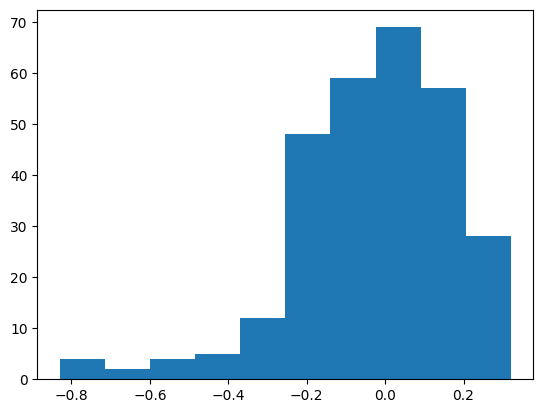

In [8]:
import matplotlib.pyplot as plt
plt.hist(conv.weights[0].numpy().reshape(-1, 1)) # 4차원 데이터를 1차원으로 변경
plt.show()

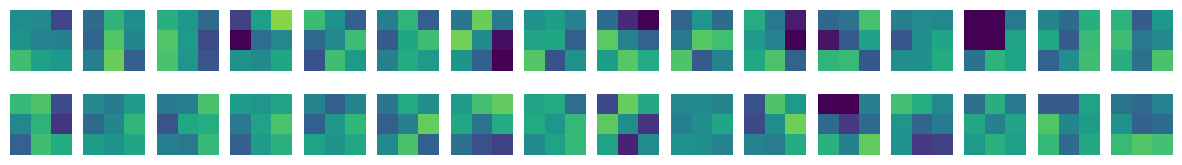

In [11]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2)) # 빈 도화지 만들기
conv_weights = conv.weights[0].numpy() # (3, 3, 1, 32)의 값 저장
for i in range(2): # 2행에
    for j in range(16): # 16개의 데이터를 넣겠다.
            axs[i, j].imshow(conv_weights[:, :, 0, i*16 + j],
                            vmin=-0.5,
                            vmax=0.5
                            )
            axs[i, j].axis('off')
plt.show()

In [12]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

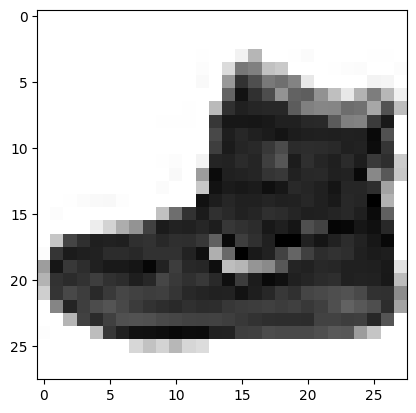

In [13]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [18]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0 #차원을 유지시키기 위해 슬라이싱 사용

In [21]:
conv_acti = keras.Model(model.layers[0].input, model.layers[0].output)

In [23]:
feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


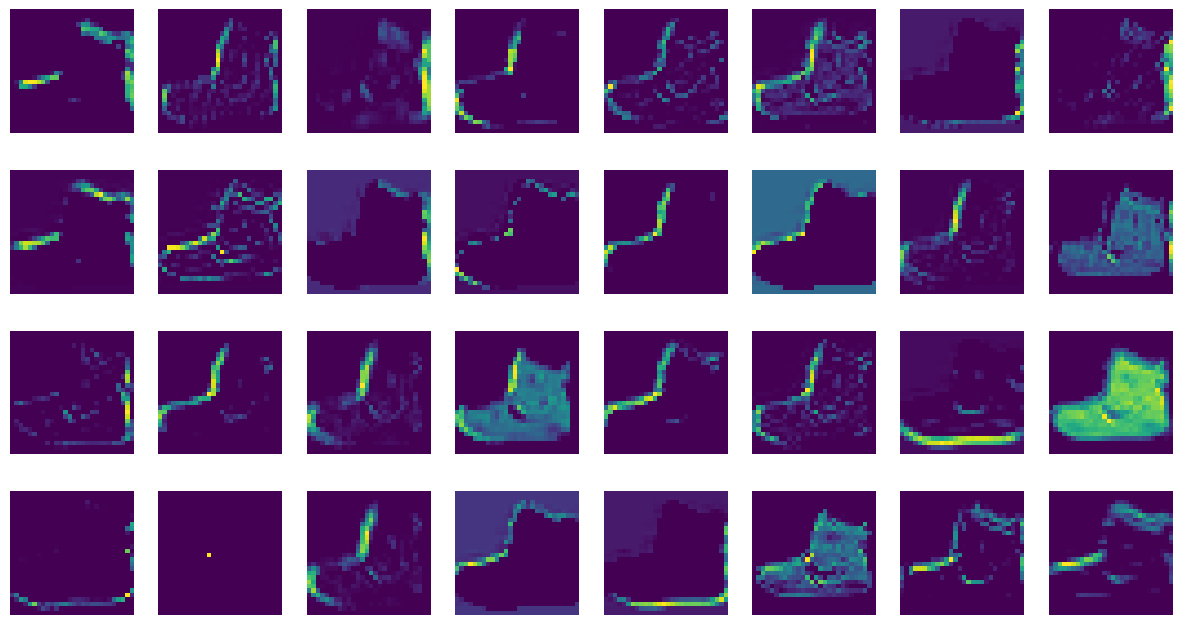

In [25]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8+j])
        axs[i, j].axis('off')
plt.show()